<a name=Indice></a>
# Índice
1. [Análisis de datos](#Análisisdedatos)
 1. [Análisis de la variable dependiente](#Análisisdelavariabledependiente)
 2. [Análisis de las variables explicativas](#Análisisdelasvariablesexplicativas)
2. [Entrenamiento de modelos](#Entrenamientodemodelos)
    1. [Preparación de datos](#Preparacióndedatos)
    2. [Experimentos](#Experimentos)
    3. [Comparación de modelos](#Comparacióndemodelos)
    4. [Optimización y combinación de modelos](#Optimizacion)
3. [Predicción](#Predicción)
4. [Anexo 1: Otros modelos considerados](#Anexo1)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import xgboost as xgb
from bayes_opt import BayesianOptimization
from tpot import TPOTRegressor
from mlens.ensemble import SuperLearner,BlendEnsemble
from sklearn.metrics import make_scorer,precision_score,accuracy_score,recall_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,HuberRegressor,SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [4]:
#Cargamos los datos de entrenamiento
train_df = pd.read_csv("data/original/Dataset_Salesforce_Predictive_Modelling_TRAIN.txt")

c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


El objetivo de este reto es es desarollo de un modelo capaz de predecir el poder adquisitivo de un cliente a partir de una serie de variables disponibles para la entidad financiera. Contar con un modelo preciso que pueda llevar a cabo estars predicciones sin duda conllevaría muchas ventajas a la hora de recomendar productos al cliente que se adecuen a sus necesidades y capacidades.

<a name=Análisisdedatos></a>
# Análisis de datos
[Volver al Indice](#Indice)

 Veamos un ejemplo de los datos con los que contamos.

In [5]:
train_df.head()

,ID_Customer,Imp_Cons_01,Imp_Cons_02,Imp_Cons_03,Imp_Cons_04,Imp_Cons_05,Imp_Cons_06,Imp_Cons_07,Imp_Cons_08,Imp_Cons_09,...,Num_Oper_17,Num_Oper_18,Num_Oper_19,Num_Oper_20,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Poder_Adquisitivo
0,TR000001,0.0,0.00,0.000000,63.067778,0.0,52.196667,0.0,0.000000,0.00,...,2,0,0,0,09991,1,70.44,3,20,19709.915000
1,TR000002,0.0,100.58,595.454545,10.899000,0.0,39.473636,0.0,62.268571,42.61,...,4,1,0,0,09991,2,71.87,3,29,37497.492167
2,TR000003,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,...,2,0,0,0,0X301,2,72.48,2,41,4802.970000
3,TR000004,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,...,0,0,0,0,0X301,2,86.60,3,38,8295.770000
4,TR000005,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,...,0,0,0,0,09991,2,92.48,4,35,24149.321667


In [6]:
train_df.columns

Index(['ID_Customer', 'Imp_Cons_01', 'Imp_Cons_02', 'Imp_Cons_03',
       'Imp_Cons_04', 'Imp_Cons_05', 'Imp_Cons_06', 'Imp_Cons_07',
       'Imp_Cons_08', 'Imp_Cons_09', 'Imp_Cons_10', 'Imp_Cons_11',
       'Imp_Cons_12', 'Imp_Cons_13', 'Imp_Cons_14', 'Imp_Cons_15',
       'Imp_Cons_16', 'Imp_Cons_17', 'Imp_Sal_01', 'Imp_Sal_02', 'Imp_Sal_03',
       'Imp_Sal_04', 'Imp_Sal_05', 'Imp_Sal_06', 'Imp_Sal_07', 'Imp_Sal_08',
       'Imp_Sal_09', 'Imp_Sal_10', 'Imp_Sal_11', 'Imp_Sal_12', 'Imp_Sal_13',
       'Imp_Sal_14', 'Imp_Sal_15', 'Imp_Sal_16', 'Imp_Sal_17', 'Imp_Sal_18',
       'Imp_Sal_19', 'Imp_Sal_20', 'Imp_Sal_21', 'Ind_Prod_01', 'Ind_Prod_02',
       'Ind_Prod_03', 'Ind_Prod_04', 'Ind_Prod_05', 'Ind_Prod_06',
       'Ind_Prod_07', 'Ind_Prod_08', 'Ind_Prod_09', 'Ind_Prod_10',
       'Ind_Prod_11', 'Ind_Prod_12', 'Ind_Prod_13', 'Ind_Prod_14',
       'Ind_Prod_15', 'Ind_Prod_16', 'Ind_Prod_17', 'Ind_Prod_18',
       'Ind_Prod_19', 'Ind_Prod_20', 'Ind_Prod_21', 'Ind_Prod_22',
       '

In [7]:
train_df.dtypes

ID_Customer           object
Imp_Cons_01          float64
Imp_Cons_02          float64
Imp_Cons_03          float64
Imp_Cons_04          float64
Imp_Cons_05          float64
Imp_Cons_06          float64
Imp_Cons_07          float64
Imp_Cons_08          float64
Imp_Cons_09          float64
Imp_Cons_10          float64
Imp_Cons_11          float64
Imp_Cons_12          float64
Imp_Cons_13          float64
Imp_Cons_14          float64
Imp_Cons_15          float64
Imp_Cons_16          float64
Imp_Cons_17          float64
Imp_Sal_01           float64
Imp_Sal_02           float64
Imp_Sal_03           float64
Imp_Sal_04           float64
Imp_Sal_05           float64
Imp_Sal_06           float64
Imp_Sal_07           float64
Imp_Sal_08           float64
Imp_Sal_09           float64
Imp_Sal_10           float64
Imp_Sal_11           float64
Imp_Sal_12           float64
                      ...   
Ind_Prod_21            int64
Ind_Prod_22            int64
Ind_Prod_23            int64
Ind_Prod_24   

In [8]:
len(train_df)

363834

Tal y como se explica en el enunciado, contamos con 88 variables que usar para predecir el poder adquisitivo y la información de cerca de 363.000 clientes con los que entrenar nuestro modelo. Esto hace que contemos con un número importante de datos que nos puede ayudar a desarrollar un modelo que tenga un rendimiento adecuado.

<a name=Análisisdelavariabledependiente> </a>
## Análisis de la variable dependiente 
Miremos con más detenimiento la variable a predecir.


In [9]:
train_df["Poder_Adquisitivo"].describe()

count    3.638340e+05
mean     1.642141e+04
std      2.436773e+04
min      3.600960e+03
25%      9.300933e+03
50%      1.292517e+04
75%      1.894854e+04
max      5.040000e+06
Name: Poder_Adquisitivo, dtype: float64

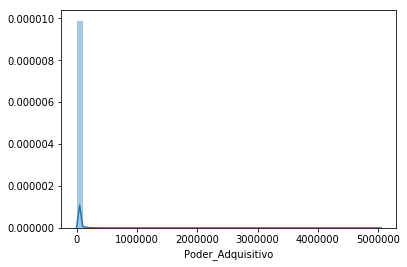

In [10]:
sns.distplot(train_df["Poder_Adquisitivo"])

In [11]:
print("Skewness: %f" % train_df["Poder_Adquisitivo"].skew())
print("Kurtosis: %f" % train_df["Poder_Adquisitivo"].kurt())

Skewness: 55.919866
Kurtosis: 7106.469270


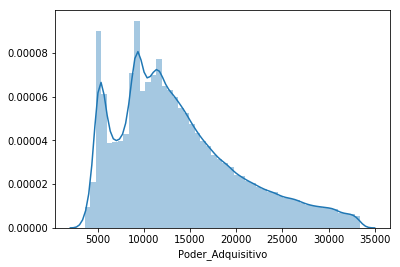

In [12]:
q1 = train_df["Poder_Adquisitivo"].quantile(0.25)
q3 = train_df["Poder_Adquisitivo"].quantile(0.75)
iqr = q3 - q1
fence_low  = q1 - 1.5 * iqr
fence_high = q3 + 1.5 * iqr

train_df_no_outliers = train_df.loc[(train_df["Poder_Adquisitivo"] > fence_low) & (train_df["Poder_Adquisitivo"] < fence_high)]
sns.distplot(train_df_no_outliers["Poder_Adquisitivo"])

In [13]:
print("Skewness: %f" % train_df_no_outliers["Poder_Adquisitivo"].skew())
print("Kurtosis: %f" % train_df_no_outliers["Poder_Adquisitivo"].kurt())

Skewness: 0.823076
Kurtosis: 0.098508


In [14]:
print("Porcentaje de datos eliminados:")
print((len(train_df.index)-len(train_df_no_outliers.index))/len(train_df.index))

Porcentaje de datos eliminados:
0.057278868934733974


Eliminando de esta manera los valores extremos, que representan alrededor del 5% de los datos totales, la distribución ahora presenta unos valores de skewness y kurtosis mucho más aceptables que permitan el entrenamiento de un modelo.

Evidentemente esta eliminación se va a realizar únicamente a la hora de entrenar, nunca a la hora de evaluar

<a name=Análisisdelasvariablesexplicativas></a>
## Análisis de las variables explicativas

De las variables explicativas, sabemos que contamos con algunas que son de tipo categórico en vez de númerico. Empezemos explorando estas variables.

In [15]:
train_df_no_outliers["Socio_Demo_01"].value_counts()

09991     97865
09992     26997
09994     20758
09993     15307
0X301     15232
09511     13078
05220      8303
06110      7633
09512      7098
06120      4987
07121      4530
04500      3986
05120      3554
08432      2732
09210      2596
9992.0     2586
06300      2501
9991.0     2443
09602      2324
04111      2221
04309      2181
09700      1914
05000      1595
03613      1565
02240      1527
02230      1491
9512.0     1481
9994.0     1407
03611      1328
05110      1326
          ...  
2936.0        1
2933.0        1
2462.0        1
2463.0        1
2473.0        1
2653          1
2325          1
2324.0        1
2323.0        1
3316.0        1
7891.0        1
3539          1
7894.0        1
9812          1
3533          1
3531.0        1
2640.0        1
8114          1
2154          1
8132          1
2156          1
2157          1
2158.0        1
8141          1
9542.0        1
3403.0        1
3323          1
2311          1
3317          1
5892.0        1
Name: Socio_Demo_01, Len

Podemos observar como Socio_Demo_01 que cuenta que muchos valores que solo aparecen un número muy bajo de veces. A la hora de transformar para su uso, es probable que la inclusión de los 921 valores posibles no aporte información discriminativa y solo sirva para aumentar el número de dimensiones. Una primera aproximación que mantenga un equilibrio entre complejidad y utilidad puede ser usar solo un número de estos valores, aquellos que aparezcan un mayor número de veces, y condensar el resto en una categoría "Other".

In [16]:
topk_socio_01 = train_df_no_outliers["Socio_Demo_01"].value_counts()[:10]
topk_socio_01

09991    97865
09992    26997
09994    20758
09993    15307
0X301    15232
09511    13078
05220     8303
06110     7633
09512     7098
06120     4987
Name: Socio_Demo_01, dtype: int64

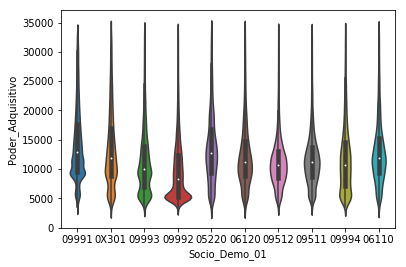

In [17]:
socio_01_keys = list(topk_socio_01.keys())
condition_array = [False] * len(train_df_no_outliers["Socio_Demo_01"])
for i in range(len(condition_array)):
    condition_array[i] = str(train_df_no_outliers["Socio_Demo_01"].iloc[i]) in socio_01_keys

sns.violinplot(x=train_df_no_outliers["Socio_Demo_01"].loc[condition_array],y=train_df_no_outliers["Poder_Adquisitivo"].loc[condition_array])

Es interesante ver como algunos valores como 09992 parecen concentrar la mayor parte de clientes en valores diferentes del resto, lo cual puede aportar información importante.

In [18]:
train_df_no_outliers["Socio_Demo_02"].value_counts()

1    206781
2    136213
Name: Socio_Demo_02, dtype: int64

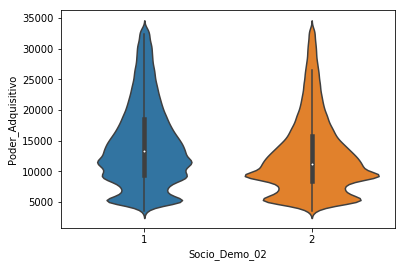

In [19]:
sns.violinplot(x=train_df_no_outliers["Socio_Demo_02"],y=train_df_no_outliers["Poder_Adquisitivo"])

Veamos el resto de variables socio demográficas.

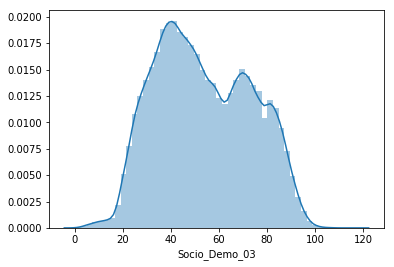

In [20]:
sns.distplot(train_df_no_outliers["Socio_Demo_03"])

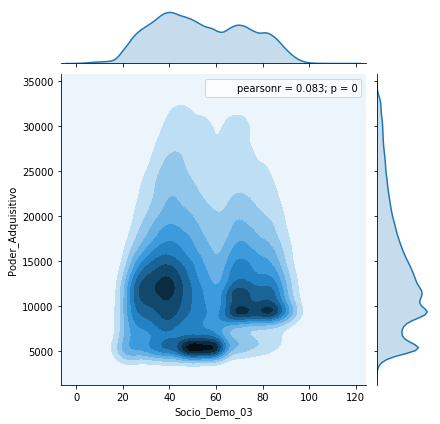

In [21]:
sns.jointplot(x=train_df_no_outliers["Socio_Demo_03"], y=train_df_no_outliers["Poder_Adquisitivo"],kind='kde')

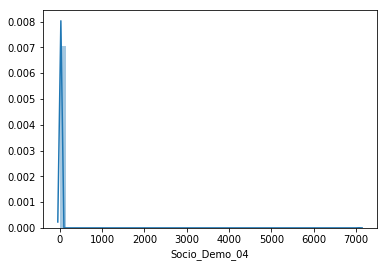

In [22]:
sns.distplot(train_df_no_outliers["Socio_Demo_04"])

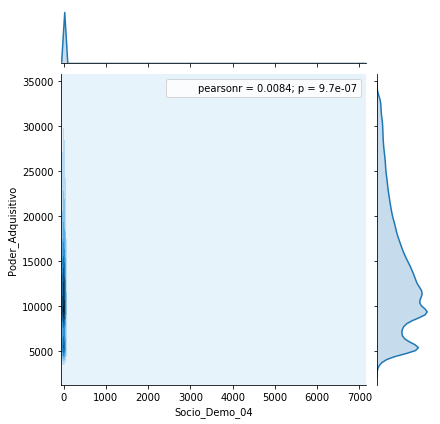

In [23]:
sns.jointplot(x=train_df_no_outliers["Socio_Demo_04"], y=train_df_no_outliers["Poder_Adquisitivo"],kind='kde')

In [24]:
train_df_no_outliers["Socio_Demo_04"].value_counts()

1       118943
2       111652
3        67361
4        33141
5         8747
6         2004
7          504
7097       280
8          149
9           56
70          42
10          21
33          20
46          20
30          14
11          11
414         10
13           8
151          6
27           2
28           2
18           1
Name: Socio_Demo_04, dtype: int64

De nuevo, observamos que una serie pequeña de valores concentra la gran mayoría de ocurrencias. Veamos si existe una relación aparente entre cada valor de esta variable y el poder adquisitivo.

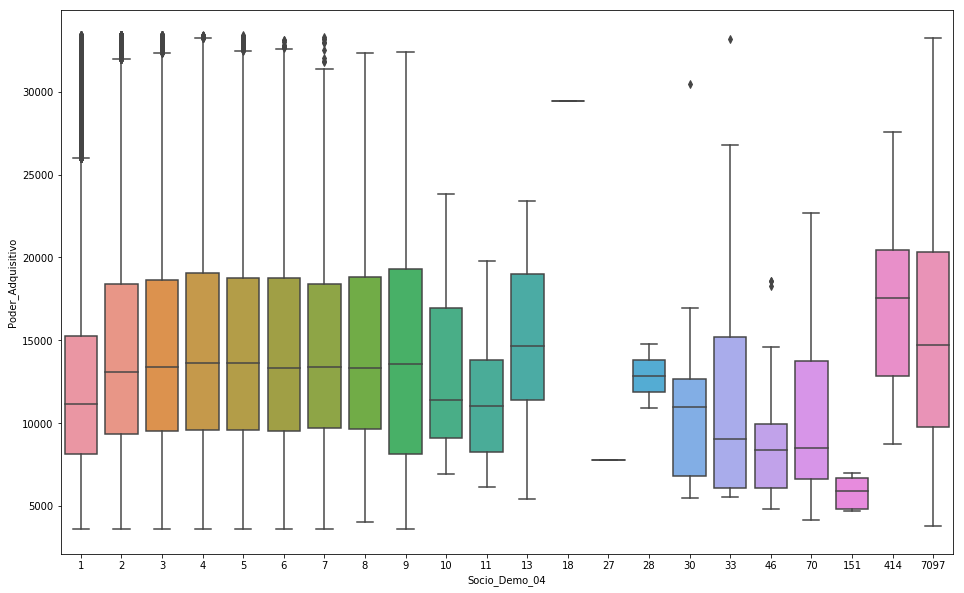

In [25]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x=train_df_no_outliers["Socio_Demo_04"], y=train_df_no_outliers["Poder_Adquisitivo"],ax=ax)

Algunos valores muestran distribuciones que son diferentes a las demás, pero aparecen un número casi insignificante de veces respecto a la totalidad de los datos, por lo que no consideremos que sea necesario complicar el modelo con esos casos.

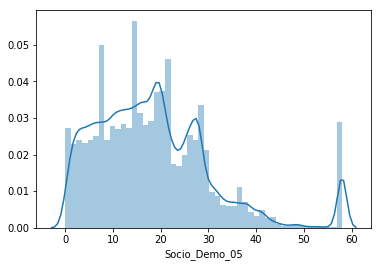

In [26]:
sns.distplot(train_df_no_outliers["Socio_Demo_05"])

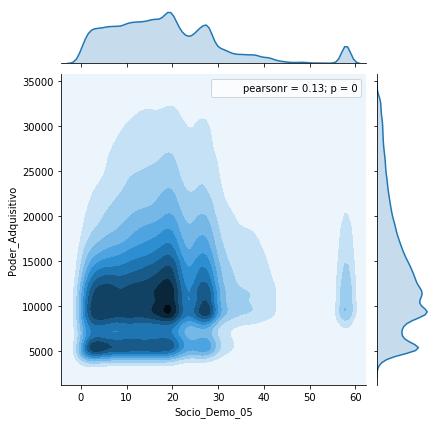

In [27]:
sns.jointplot(x=train_df_no_outliers["Socio_Demo_05"], y=train_df_no_outliers["Poder_Adquisitivo"],kind='kde')

Veamos ahora la correlación de las variables explicativas con el poder adquisitivo, medida mediante el coeficiente de Pearson.

In [28]:
train_df_no_outliers.corr(method='pearson').iloc[-1].sort_values(ascending=False,axis=0)[1:]

Imp_Sal_21       0.446199
Num_Oper_05      0.377380
Imp_Sal_19       0.364050
Ind_Prod_24      0.333431
Ind_Prod_08      0.271821
Imp_Sal_12       0.268169
Num_Oper_18      0.267717
Ind_Prod_11      0.263711
Imp_Cons_02      0.254591
Imp_Sal_08       0.254518
Imp_Cons_12      0.251392
Imp_Cons_06      0.243734
Imp_Sal_20       0.235902
Ind_Prod_05      0.229769
Imp_Cons_04      0.228519
Imp_Sal_09       0.224180
Ind_Prod_21      0.223633
Imp_Sal_04       0.221237
Imp_Cons_09      0.221097
Imp_Cons_01      0.219669
Imp_Cons_16      0.218312
Num_Oper_06      0.218307
Num_Oper_15      0.207412
Imp_Cons_03      0.203556
Ind_Prod_09      0.203247
Imp_Sal_15       0.202924
Num_Oper_02      0.196814
Imp_Sal_16       0.196771
Imp_Cons_08      0.191842
Num_Oper_08      0.190259
                   ...   
Imp_Sal_18       0.052718
Ind_Prod_04      0.051391
Ind_Prod_13      0.050400
Num_Oper_20      0.050110
Imp_Cons_14      0.049796
Num_Oper_13      0.049279
Num_Oper_09      0.042742
Num_Oper_14 

Vemos como algunas variables presentan coeficientes de correlación medios, lo que indica que serán útiles para los modelos.

<a name=Entrenamientodemodelos></a>
# Entrenamiento de modelos
[Volver al Indice](#Indice)

<a name=Preparacióndedatos></a>
## Preparación de datos
Con todo lo visto anteriormente estamos listos para preparar los datos para la experimentación. Vamos a definir una función que realize este pre-procesado de los datos. 

La transformación básica consiste en convertir las variables categóricas a valores one-hot, y eliminar la columna ID_Customer que no es más que un identificador del cliente.


Con processing_type = 1 se puede indicar además que queremos filtrar los outliers (pero únicamente en tiempo de entrenamiento)



In [29]:
def process_df(df,processing_type,train = True):
    if processing_type == 1:
        return process_df_1(df,train)
    else:
        return process_df_1(df,False)
    
def process_df_1(df,train = True):
    df = df.drop(labels=["ID_Customer"],axis=1)
    
    if train:
        # Eliminamos los outliers solo en el caso de que estemos entrenando
        q1 = df["Poder_Adquisitivo"].quantile(0.25)
        q3 = df["Poder_Adquisitivo"].quantile(0.75)
        iqr = q3 - q1
        fence_low  = q1 - 1.5 * iqr
        fence_high = q3 + 1.5 * iqr

        df = df.loc[(df["Poder_Adquisitivo"] > fence_low) & (df["Poder_Adquisitivo"] < fence_high)]
    
        
    
    # Convertimos las variables a one-hot

    # Socio_Demo_01
    
    topk_socio_01 = df["Socio_Demo_01"].value_counts()[:10]
    socio_01_keys = list(topk_socio_01.keys())
    
    for key in socio_01_keys:
        on = df["Socio_Demo_01"] == key
        df.insert(loc=len(df.columns), column="Socio_Demo_01_"+str(key), value=on.astype(int))
    
    # El resto lso agrupamos en 'Other'
    condition_array = [False] * len(df["Socio_Demo_01"])
    for i in range(len(condition_array)):
        condition_array[i] = str(df["Socio_Demo_01"].iloc[i]) not in socio_01_keys
    df.insert(loc=len(df.columns), column="Socio_Demo_01_Other", value=condition_array)
    df["Socio_Demo_01_Other"] = df["Socio_Demo_01_Other"].astype(int)
    
    df = df.drop(axis=1, columns=["Socio_Demo_01"])
    
    # Socio_Demo_02
    c1=df["Socio_Demo_02"] == 1
    c2=df["Socio_Demo_02"] == 2
    df.insert(loc=len(df.columns), column="Socio_Demo_02_01", value=c1.astype(int))
    df.insert(loc=len(df.columns), column="Socio_Demo_02_02", value=c2.astype(int))
    
    df = df.drop(axis=1, columns=["Socio_Demo_02"])

    
    # Convertimos todas las columnas Ind_prod a one-hot
    
    for i in range(1,25):
        column_name = "Ind_Prod_" + str(i).zfill(2)
        c0=df[column_name] == 0
        c1=df[column_name] == 1
        c2=df[column_name] == 2
        
        df.insert(loc=len(df.columns), column=column_name + "_00", value=c0.astype(int))
        df.insert(loc=len(df.columns), column=column_name + "_01", value=c1.astype(int))
        df.insert(loc=len(df.columns), column=column_name + "_02", value=c2.astype(int))
    
        df = df.drop(axis=1, columns=[column_name])
    
    
    
    return df

En primer lugar vamos a barajar los datos, y a continuación vamos a realizar una partición de los datos para realizar **validación cruzada** en 5 bloques, con el objetivo de realizar un análisis de resultados de los diferentes modelos de manera correcta y fiable.

Este método divide los datos en los conjustos de entrenamiento y test para cada partición, y los almacena en la variable splits.

In [30]:
SEED = 4
K = 5

shuffled_data = train_df.sample(frac=1,replace=False,random_state=SEED)

kf = KFold(n_splits=K)
kf.get_n_splits(shuffled_data)

def get_splits(kf,processing_type):
    splits=[]
    for train_index, test_index in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train_index]
        test_data = shuffled_data.loc[test_index]

        train_data_proc = process_df(train_data,processing_type,train=True)
        test_data_proc = process_df(test_data,processing_type,train=False)


        splits.append((train_data_proc,test_data_proc))
    return splits


Dado un modelo y los splits que hemos realizado a los datos, a continuación definimos una función que, para cada partición de entrenamiento y test, entrene un modelo con los datos de entrenamiento correspondiente y calcule métricas sobre el conjunto de validación.

En lo que se refiere a métricas, en primer lugar hemos escogido la **ráiz del error cuadrático medio (RMSE)**, una de las métricas más comunes para evaluar modelos de regresión. El problema que tiene esta métrica es que penaliza de manera desmedida fallos grandes. Resulta mucho más interesante medir el funcionamiento del algoritmo con una métrica que refleje mejor su funcionamiento con la mayoría de clientes, cosa que consideramos más útil a la hora de decidirnos por un modelo u otro. Por eso medimos los resultados con respecto a la **media del error absoluto (MAE)** y a la **mediana del error (MAD).** Esta última métrica no es susceptible a outliers y nos permite conocer mejor cual es el comportamiento "medio" de cada modelo.

In [31]:
def train_and_evaluate(model,splits,skcompat=False,scaler=None):
    rmse = []
    mae = []
    mad = []
    # Para cada iteración de validación cruzada
    for s in range(len(splits)):
        train_data_proc,test_data_proc = splits[s]
        
        # Obtenemos los datos de entrenamiento
        x_train = train_data_proc.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
        y_train = train_data_proc["Poder_Adquisitivo"].as_matrix()

        # Obtenemos los datos de test
        x_test = test_data_proc.drop(labels=["Poder_Adquisitivo"], axis=1).as_matrix()
        y_test = test_data_proc["Poder_Adquisitivo"].as_matrix()
        
        # Damos la posiblidad de usar un scaler
        if scaler is not None:
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
           
        # Caso base, entrenamos un modelo y obtenemos las predicciones
        if not skcompat:
            model.fit(X=x_train,y=y_train)
            
            # For compatibility with XGBoost
            # yhat = model.predict(X=x_test)
            yhat = model.predict(x_test)
        
        # En el caso de que sea un objeto skcompat, las llamadas a los métodos son ligeramente diferentes.
        else:
            model.fit(x=x_train,y=y_train,steps=STEPS)
            yhat = model.predict(x=x_test)['scores']
        
        # Calculamos métricas 
        rmse.append(math.sqrt(mean_squared_error(y_true=y_test, y_pred=yhat)))
        mae.append(mean_absolute_error(y_true=y_test,y_pred=yhat))
        mad.append(median_absolute_error(y_true=y_test,y_pred=yhat))
        
    return (rmse,mae,mad)

Por último, nos definimos un método para guardar los resultados para su posterior visualización.

In [32]:
scores = {'modelo':[], 'rmse':[],'mae':[],'mad':[]}

def record_scores(name,rmse,mae,mad):
    scores['modelo'].append(name)
    scores['rmse'].append(rmse)
    scores['mae'].append(mae)
    scores['mad'].append(mad)

<a name=Experimentos></a>
## Experimentos

A continuación vamos a exponer una serie de resultados que hemos obtenido evaluando diferentes modelos. Cabe destacar que la cantidad de experimentos realizada es mucho mayor de la mostrada aquí, pero se ha llevado a cabo una selección de aquellos que, a nuestro juicio, son más interesantes. En caso contrario este documento hubiera sido todavía más largo de lo que ya es.

En primer lugar probaremos diferentes modelos tras aplicar el preproceso en el que eliminamos **outliers.**

In [33]:
splits = []
splits = get_splits(kf,1)

Inicialmente probamos diferentes modelos de regresión lineal.

In [34]:
model = LinearRegression()
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('Linear Regresion',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 21866.239828
MAE: 5257.209822
MAD: 3039.409075


In [35]:
model = MLPRegressor(max_iter=200,hidden_layer_sizes=(50,50,50,50),early_stopping=True,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('ANN50*4',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 21702.603384
MAE: 4728.631802
MAD: 2397.541365


Probamos ahora diferentes modelos basados en árboles.

In [36]:
model = DecisionTreeRegressor(min_samples_split=200, min_samples_leaf=50, random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('RegressionTree',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 22670.479224
MAE: 4802.948535
MAD: 2223.817397


In [37]:
model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=23, max_features='log2',min_samples_leaf=5,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('RF_d23',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 22861.309229
MAE: 5112.145407
MAD: 2549.585133


In [38]:
model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=23, max_features='auto',min_samples_leaf=5,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('RF_d23_FULL',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 22655.050330
MAE: 4621.045433
MAD: 2059.083895


El permitir que se hagan splits sobre todas las features incrementa sustancialmente el tiempo de entrenamiento, pero hace que este modelo supere al rest.

Probamos ahora con la técnica de Gradient Boosting.

In [39]:
model = GradientBoostingRegressor(random_state=SEED,min_samples_leaf=5,max_depth=5)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('Gradient Boost_d5',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 22660.424748
MAE: 4675.047281
MAD: 2163.067239


In [40]:
model = GradientBoostingRegressor(random_state=SEED,min_samples_leaf=5,max_depth=7)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('Gradient Boost_d7',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 22657.066140
MAE: 4597.104610
MAD: 2070.359545


De nuevo, llegados a este punto los modelos empiezan a requerar un tiempo de entrenamiento elevado a medida que se aumenta la profundidad máxima.

Una comparación importante a realizar es comprobar si nuestra idea inicial de eliminar outliers ha dado sus frutos. Probamos ahora a entrenar una serie de modelos ***sin eliminar outliers***.

In [41]:
splits = []
splits = get_splits(kf,0)

In [42]:
model = LinearRegression()
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('raw Linear Regression',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 20453.694566
MAE: 5780.098872
MAD: 3266.257244


In [43]:
model = MLPRegressor(max_iter=200,hidden_layer_sizes=(50,50,50,50),early_stopping=True,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('raw ANN50*4',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 20525.062038
MAE: 6248.621772
MAD: 3751.984974


In [44]:
model = GradientBoostingRegressor(random_state=SEED,min_samples_leaf=5,max_depth=5)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('raw Gradient Boost_d5',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 19442.444211
MAE: 4790.685370
MAD: 2522.061022


In [45]:
model = GradientBoostingRegressor(random_state=SEED,min_samples_leaf=5,max_depth=7)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('raw Gradient Boost_d7',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

"""
RMSE: 19659.521910
MAE: 4686.435566
MAD: 2390.403421
"""
""" Y un  montón de tiempo"""

RMSE: 19659.521910
MAE: 4686.435566
MAD: 2390.403421


' Y un  montón de tiempo'

In [46]:
%%time
params =  {'max_depth': 13, 'eta': 0.1, 'silent': 1, 'objective': 'reg:linear', 'subsample':0.8,'eval_metric':'rmse','nthread':4,'seed':SEED}
model = XGBoostModel(params,100)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw_XGB_d13_eta0.1_n100_sbspl',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

NameError: name 'XGBoostModel' is not defined

In [47]:

model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=23, max_features='auto',min_samples_leaf=5,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw RF_d23_FULL',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 18624.512787
MAE: 4408.208644
MAD: 2097.194139


In [48]:
%%time
model = xgb.XGBRegressor(max_depth=13, learning_rate=0.1, alpha=0,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=0.8,colsample_bytree=1.0,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw_XGB_d13_eta0.1_n100_sbspl',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 19112.578472
MAE: 4439.002901
MAD: 2157.203059
Wall time: 3min 25s


In [49]:
%%time
model = xgb.XGBRegressor(max_depth=13, learning_rate=0.1, alpha=0,n_estimators=50, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=0.8,colsample_bytree=1.0,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw_XGB_d13_eta0.1_n100_sbspl',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 19155.746115
MAE: 4457.608207
MAD: 2175.099049
Wall time: 5min 29s


Sorprendentemente, si bien para el resto de modelos si que apreciamos que el filtrado de outliers supone sustanciales ganancias en términos de MAE y MAD, en el caso del Random Forest la pequeña diferencia en MAD se ve compensado por una reducción muy importante en RMSE y MAE. 

<a name=Comparacióndemodelos></a>
## Comparación de modelos

In [50]:
scores_df = pd.DataFrame(data=scores)

scores_df = scores_df.set_index('modelo')

display(scores_df)

,mad,mae,rmse
modelo,,,
Linear Regresion,3039.409075,5257.209822,21866.239828
ANN50*4,2397.541365,4728.631802,21702.603384
RegressionTree,2223.817397,4802.948535,22670.479224
RF_d23,2549.585133,5112.145407,22861.309229
RF_d23_FULL,2059.083895,4621.045433,22655.050330
Gradient Boost_d5,2163.067239,4675.047281,22660.424748
Gradient Boost_d7,2070.359545,4597.104610,22657.066140
raw Linear Regression,3266.257244,5780.098872,20453.694566
raw ANN50*4,3751.984974,6248.621772,20525.062038


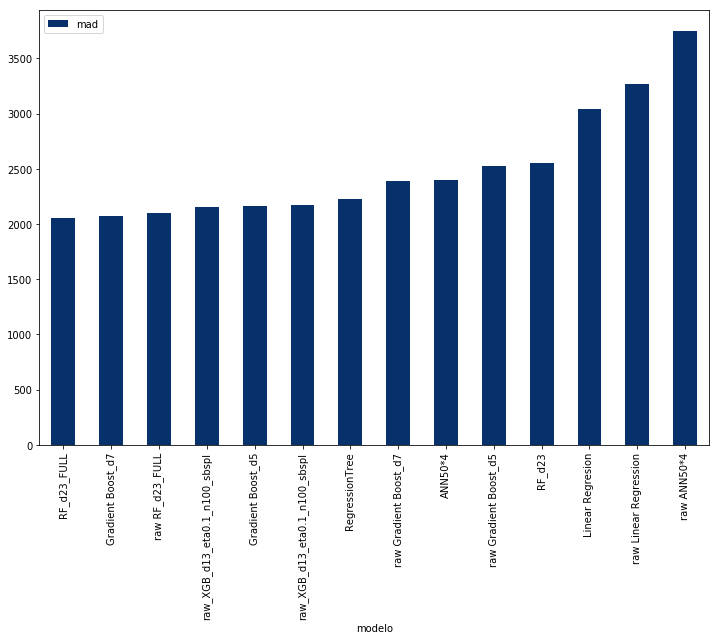

In [51]:
scores_df = scores_df.sort_values(by="mad")
scores_df.plot(kind='bar',y='mad',colormap='Blues_r',figsize=(12, 8))

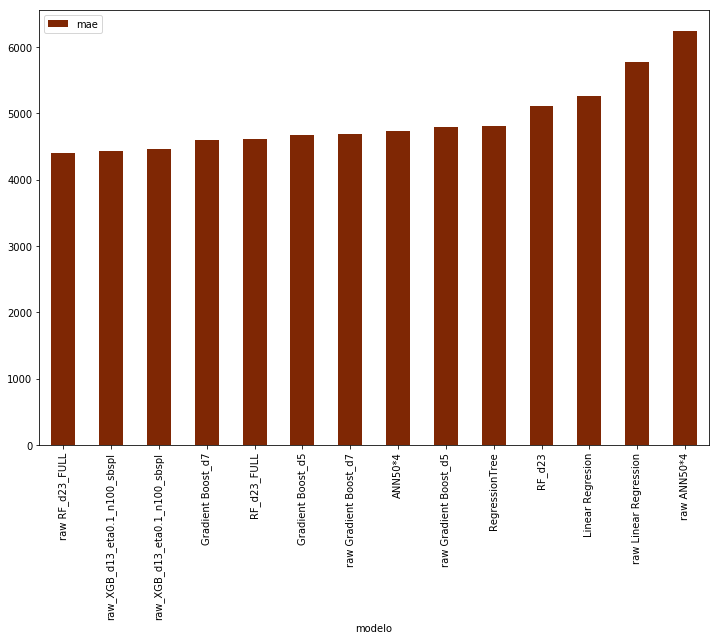

In [52]:
scores_df = scores_df.sort_values(by="mae")
scores_df.plot(kind='bar',y='mae',colormap='Oranges_r',figsize=(12, 8))

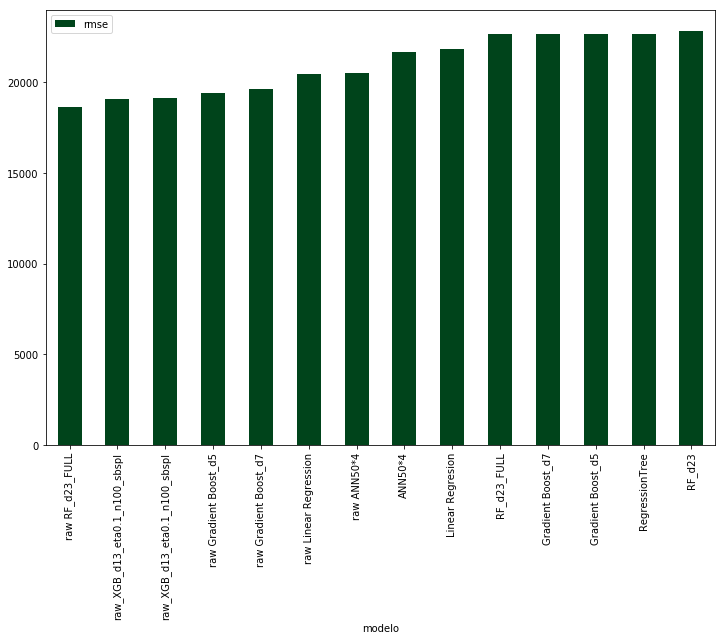

In [53]:
scores_df = scores_df.sort_values(by="rmse")
scores_df.plot(kind='bar',y='rmse',colormap='Greens_r',figsize=(12, 8))

Teniendo en cuenta todo esto, finalmente nos hemos decidido por el modelo **raw RF_d23_n100_FULL**. Inicialmente, y con la mayoría de modelos, nuestra idea inicial de eliminar outliers había obtenido mejoras muy grandes en MAE y MAD que, a nuestro juicio, compensaban de sobra pequeñas pérdidas en RMSE ya que mejoraban el conjunto de las predicciones. Sin embargo, los modelos de Random Forest profundos han demostrado que son capaces de reducir de enorme manera los grandes errores cometidos en algunos clientes puntuales, a cambio de una pequeña pérdida de MAD. Si bien el rendimiento se reducirá muy ligeramente en general (en realidad se reduce de manera ínfima, si nos fijamos en el MAD, significa que el error mediano empeora sólo en 30€), esto nos va a permitir cometer fallos mucho más pequeños en clientes atípicos, ya que reducimos en más de 4000€ el RMSE, por lo que finalmente hemos optado por este modelo. 

<a name=Optimizacion></a>
## Optimización y combinación de modelos

De todos estos experimentos, se puede observar como los modelos más prometedores son el RandomForest y el GradientBoosting implementado sobre XGBoost. Ahora lo que nos gustaría hacer es encontrar los mejores hiperparámetros para estos problemas. Dado un cierto modelo, se puede entender el proceso de encontrar los **hiperparámetros óptimos** como un proceso de optimización de una **función**, que devuelve las métricas de validación cruzada del modelo, y cuyos **argumentos** son los hiperparámetros del modelo. Esta función es difícil de optimizar ya que:

* Es una función **muy costosa** de evaluar, tenemos que entrenar por completo un modelo cada vez que queramos extraer un punto.
* Tiene un **espacio grande** de posibles parámetros/argumentos.
* **Desconocemos la estructura** de este espacio y las **interacciones entre los diferentes argumentos**.

La **Optimización Bayesiana** nos ofrece una solución a este problema, ya que es una técnica pensada para optimizar funciones de tipo **caja-negra** como la que tenemos entre manos.

In [54]:
f_train_df = process_df(shuffled_data,0,train = True)

X_train = f_train_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = f_train_df["Poder_Adquisitivo"].as_matrix()

xgtrain = xgb.DMatrix(X_train, label=y_train)


def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=100, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(5)])

    return -cv_result['test-mae-mean'].values[-1]





random_state = SEED
num_iter = 50
init_points = 25
params = {
    'eta': 0.1,
    'silent': 1,
    'eval_metric': 'mae',
    'verbose_eval': True,
    'seed': random_state
}

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                            'colsample_bytree': (0.1, 1),
                                            'max_depth': (5, 20),
                                            'subsample': (0.5, 1),
                                            'gamma': (0, 15),
                                            'alpha': (0, 15),
                                            })

xgbBO.maximize(init_points=init_points, n_iter=num_iter)

print(xgbBO.res['max'])

Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
    1 | 02m29s | -4856.00176 |    6.6560 |             0.5238 |    3.2767 |      5.7410 |            10.1451 |      0.8893 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
Stopping. Best iteration:
[32]	train-mae:4252.69+43.7159	test-mae:4621.37+59.2871

    2 | 01m50s | -4621.36797 |    2.8667 |             0.3331 |    9.5405 |     13.6173 |            14.2446 |      0.7408 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't imp

Will train until test-mae hasn't improved in 5 rounds.
   25 | 01m42s | -4824.07822 |   10.0745 |             0.1712 |    5.5886 |      8.8006 |            16.3455 |      0.9420 | 
Bayesian Optimization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
Stopping. Best iteration:
[30]	train-mae:3392.57+68.7942	test-mae:4339.84+64.1586

   26 | 05m53s | -4339.84082 |    0.0000 |             1.0000 |    0.0000 |     20.0000 |            20.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
Stopping. Best iteration:
[35]	train-mae:2171.18+84.9442	te

   49 | 01m48s | -4983.69648 |    0.0000 |             1.0000 |   15.0000 |      5.0000 |            20.0000 |      0.5000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
Stopping. Best iteration:
[34]	train-mae:3041.78+79.0828	test-mae:4376.95+97.4871

   50 | 05m25s | -4376.95186 |    0.0000 |             1.0000 |    0.2007 |     16.9640 |             1.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
Stopping. Best iteration:
[34]	train-mae:2839.46+87.2431	test-mae:4367.33+95.3721

   51 | 05m53s | -4367.32949 |    1.8822 |             1.0000 |    1.6612 |     17.2188 |             1.0264 |      1.0000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
Stopping. Best iteration:
[33]	train

c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-54.58791709]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
Stopping. Best iteration:
[33]	train-mae:2861.91+74.9708	test-mae:4371.37+96.0223

   56 | 05m41s | -4371.36709 |    0.0000 |             1.0000 |    3.7159 |     17.3637 |             1.9830 |      1.0000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
Stopping. Best iteration:
[36]	train-mae:2147.82+82.9323	test-mae:4385.95+97.9062

   57 | 07m29s | -4385.94795 |    6.4396 |             1.0000 |    0.0000 |     20.0000 |             1.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
   58 | 01m09s | -5136.97090 |   15.0000 |             0.1000 |   15.0000 |      5.0000 |             9.9421 |      0.5000 | 
Multiple eval metrics have been pass

c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([18.68002131]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 5 rounds.
   75 | 02m46s | -5054.46367 |    7.5008 |             0.1000 |    0.0000 |     20.0000 |            20.0000 |      1.0000 | 
{'max_val': -4339.8408204, 'max_params': {'min_child_weight': 20.0, 'colsample_bytree': 1.0, 'max_depth': 20.0, 'subsample': 1.0, 'gamma': 0.0, 'alpha': 0.0}}


In [55]:
f_train_df = process_df(shuffled_data,0,train = True)

X_train = f_train_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = f_train_df["Poder_Adquisitivo"].as_matrix()

def model_evaluate(n_estimators,
                 max_depth,
                max_features,
                 min_samples_leaf,
                  ):

    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_leaf = int(min_samples_leaf)
    max_features = max(min(max_features, 1), 0.1)

    model = RandomForestRegressor(n_estimators=n_estimators,
                 max_depth=max_depth,
                max_features=max_features,
                 min_samples_leaf=min_samples_leaf,
                                 n_jobs=4,random_state=SEED)

    cv_result = cross_val_score(model,X_train,y_train,cv=kf,scoring="neg_median_absolute_error")

    return np.mean(cv_result)


num_iter = 50
init_points = 10


modelBO_2 = BayesianOptimization(model_evaluate, {'n_estimators': (30, 100),
                                            'max_depth': (17, 27),
                                            'min_samples_leaf': (5, 200),
                                                'max_features' :(0.5,1),
                                            })

modelBO_2.maximize(init_points=init_points, n_iter=num_iter)

print(modelBO_2.res['max'])

Initialization
--------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   min_samples_leaf |   n_estimators | 
    1 | 08m14s | -2133.33987 |     24.5365 |         0.5463 |            61.2404 |        76.5974 | 
    2 | 12m26s | -2132.06977 |     20.5245 |         0.6838 |            70.1359 |        94.2930 | 
    3 | 15m00s | -2122.46885 |     26.7903 |         0.8317 |            76.1536 |        94.6255 | 
    4 | 08m12s | -2103.50133 |     22.3752 |         0.6929 |            46.6645 |        57.0253 | 
    5 | 09m32s | -2064.39884 |     23.7545 |         0.7277 |            20.4162 |        60.9400 | 
    6 | 10m48s | -2184.08364 |     26.3420 |         0.7556 |           147.9716 |        80.5580 | 
    7 | 06m17s | -2168.82851 |     19.3052 |         0.5562 |            96.3172 |        58.0007 | 
    8 | 07m03s | -2179.35403 |     22.7526 |         0.9151 |           152.869

c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.01461258]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   14 | 25m03s | -2033.62012 |     27.0000 |         1.0000 |             5.0000 |       100.0000 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.15966797]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-950.32775879]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1209.11816406]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   15 | 05m00s | -2158.01573 |     19.9778 |         0.5818 |            81.8090 |        44.2513 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-57.671875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 86, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-158855.52734375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-84119.39453125]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 69, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdat

   16 | 08m43s | -2169.95208 |     18.2775 |         0.6193 |           102.1630 |        73.2457 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-115.01708984]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 69, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.03955078]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-11867.98291016]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


   17 | 05m40s | -2191.68064 |     26.7105 |         0.7964 |           167.5736 |        37.1487 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-24912.76953125]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.99928713]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 26, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-4.63085938]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


   18 | 06m21s | -2236.35234 |     21.9705 |         0.5248 |           195.6083 |        67.0209 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-26546.16670625]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 67, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-901.43251025]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.57855474]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\

   19 | 04m33s | -2147.68288 |     21.9358 |         0.5953 |            74.8553 |        37.5276 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-160.29898216]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-247.30654562]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   20 | 05m52s | -2198.22262 |     20.3314 |         0.9541 |           180.1742 |        33.8349 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-82903.30566406]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-8267.0390625]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   21 | 09m24s | -2157.93670 |     24.4464 |         0.7786 |           109.0879 |        64.6651 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-318.49228909]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 62, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1027.9546272]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


   22 | 13m10s | -2132.02125 |     19.2106 |         0.9002 |            79.2229 |        76.2453 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-13147.09578868]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-43892.02342364]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 87, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


   23 | 09m20s | -2053.14598 |     24.8756 |         0.9634 |             6.4541 |        39.0047 | 
   24 | 09m00s | -2226.53195 |     22.8474 |         0.5710 |           197.3313 |        88.1890 | 
   25 | 11m03s | -2093.36170 |     18.2805 |         0.7643 |            10.5527 |        65.6093 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-18391.20703125]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 77, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


   26 | 17m09s | -2091.78108 |     22.4466 |         0.9636 |            46.8209 |        88.9752 | 
   27 | 06m14s | -2100.73574 |     19.1833 |         0.9656 |            46.8945 |        32.1207 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6911.21210232]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   28 | 06m03s | -2179.97847 |     20.6696 |         0.5714 |           116.1026 |        55.9804 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-103274.00439453]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-95251.88964844]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 68, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)


   29 | 08m23s | -2080.35480 |     20.9819 |         0.9868 |            27.0664 |        40.4330 | 
   30 | 08m54s | -2192.18430 |     20.5406 |         0.6334 |           146.1306 |        76.1181 | 
   31 | 14m50s | -2167.50870 |     25.3696 |         0.8115 |           128.3468 |        99.6100 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-80672.4765625]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 80, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-93217.21484375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


   32 | 04m42s | -2229.06927 |     18.2366 |         0.5484 |           185.8037 |        46.5041 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-43965.265625]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   33 | 10m04s | -2200.77467 |     26.6147 |         0.5762 |           156.0981 |        95.5526 | 
   34 | 05m53s | -2127.59537 |     23.4614 |         0.9586 |            76.4866 |        31.6484 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-102983.99111787]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.59246694]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 28, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.03435297]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 70, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\lo

   35 | 05m52s | -2144.85332 |     18.0940 |         0.7663 |            80.7048 |        39.1475 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-113.61664237]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-112965.98699596]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


   36 | 07m57s | -2157.46545 |     26.0632 |         0.8916 |           112.1999 |        46.3485 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-118135.34765625]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 87, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-95857.40039062]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-661.67773438]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\app

   37 | 04m27s | -2135.33915 |     20.1963 |         0.7057 |            73.2978 |        31.0507 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.88691103]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 74, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-13594.89678134]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 29, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


   38 | 05m57s | -2214.46378 |     23.2129 |         0.5999 |           180.5909 |        53.6372 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-782.53878421]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9934.44481394]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   39 | 09m21s | -2095.52682 |     21.8086 |         0.8253 |            45.9145 |        54.5562 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-16564.6875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   40 | 12m18s | -2143.03410 |     25.1183 |         0.7318 |            91.6944 |        88.7682 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-615.171875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-7558.59375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


   41 | 07m22s | -2101.99594 |     25.9206 |         0.5198 |            35.5725 |        65.1397 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1109.59375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.0625]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-121614.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 145, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\program

   42 | 10m22s | -2070.09688 |     23.5828 |         0.7520 |            24.0078 |        63.7585 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.08778551]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 66, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.42464525]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.0731721]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 100, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


   43 | 08m30s | -2198.34920 |     19.1641 |         0.7500 |           175.2813 |        61.5796 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.72180081]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 74, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-645.89770704]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-941.56330752]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 66, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   44 | 09m39s | -2168.95012 |     21.5382 |         0.7731 |           123.5771 |        67.8002 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-45384.05859375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.12304688]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-128263.9609375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 107, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appda

   45 | 09m49s | -2063.53507 |     22.9329 |         0.8502 |             5.7341 |        47.0497 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-52201.65479225]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 68, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.26894875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-98.961593]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\loc

   46 | 06m05s | -2190.03569 |     22.9152 |         0.6455 |           143.4020 |        49.8901 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-16861.24549427]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-10618.88860747]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


   47 | 05m03s | -2167.22585 |     26.1566 |         0.5889 |            99.0492 |        44.1411 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-635.1875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 73, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-539.3125]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 75, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


   48 | 08m18s | -2198.67606 |     17.8860 |         0.9900 |           178.2799 |        48.6490 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1943.58935547]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.70599599]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 34, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-90074.53271484]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   49 | 03m28s | -2170.33595 |     25.0565 |         0.5523 |            97.0651 |        32.5869 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-175127.234375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 67, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-63992.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 84, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2657.71875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\p

   50 | 07m35s | -2181.22166 |     18.9761 |         0.8803 |           141.1756 |        47.5602 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-257.56947158]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 88, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-203414.83839179]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   51 | 17m16s | -2104.92836 |     17.1202 |         0.9574 |            35.1899 |        89.5310 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([7.481339]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-11983.10781835]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 67, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9580.55555849]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


   52 | 07m43s | -2098.30615 |     22.4321 |         0.5286 |            31.6048 |        67.3881 | 
   53 | 11m02s | -2113.80545 |     22.9410 |         0.7308 |            58.0766 |        75.5250 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([3.05568884]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-134507.40637341]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.15976216]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)


   54 | 03m47s | -2129.19735 |     19.0802 |         0.5673 |            47.5555 |        32.5348 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-11227.93682298]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 59, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5677.50338483]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 71, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-14353.89736357]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\app

   55 | 14m11s | -2140.94140 |     22.7466 |         0.9024 |            96.9705 |        83.5599 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   56 | 04m49s | -2112.75841 |     18.2189 |         0.6395 |            30.3444 |        35.0682 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.26171875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-21383.9453125]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 30, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


   57 | 15m33s | -2146.21093 |     17.2563 |         0.8235 |            83.0309 |        99.7355 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9710.375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-90746.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 46, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


   58 | 06m50s | -2152.43189 |     26.0349 |         0.8375 |           104.6618 |        41.7197 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-10702.5576034]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 79, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.09132852]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 75, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2141.5360389]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


   59 | 14m00s | -2123.49467 |     17.3669 |         0.9776 |            60.7579 |        73.0778 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-34398.04663308]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-36106.72061441]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


   60 | 12m38s | -2094.41430 |     18.2815 |         0.8054 |            25.5056 |        75.2742 | 


c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3677.6796875]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 45, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-32442.859375]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 31, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


{'max_val': -2033.620124956041, 'max_params': {'n_estimators': 100.0, 'max_depth': 27.0, 'min_samples_leaf': 5.000000000081684, 'max_features': 0.9999999999711415}}


Como resultado del proceso de optimización hemos obtenido los siguientes parámetros para los dos modelos:

In [56]:
%%time
model = xgb.XGBRegressor(max_depth=20, learning_rate=0.1, alpha=0,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=20.0,random_state=SEED )

scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('opt_xgb_Boost',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 19118.545240
MAE: 4397.943756
MAD: 2068.395546
Wall time: 4min 59s


In [57]:
model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=23, max_features='auto',min_samples_leaf=50,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('opt_raw RF_d23_FULL',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 19468.499263
MAE: 4477.545577
MAD: 2129.707573


A la hora de escoger el mejor modelo, una primera aproximación consiste en escoger el modelo que haya obtenido mejores resultados. Otra opción más avanzada consiste en hacer una **combinación de modelos**. Veamos que sucedería si realizaramos una combinación de modelos utilizando el mismo modelo pero cambiando la semilla aleatoria.

In [58]:
stk_train_df = process_df(shuffled_data.iloc[:int(shuffled_data.shape[0]*0.8)].copy(),0)
stk_test_df = process_df(shuffled_data.iloc[int(shuffled_data.shape[0]*0.8):].copy(),0)


X_train = stk_train_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = stk_train_df["Poder_Adquisitivo"].as_matrix()

X_test = stk_test_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_test = stk_test_df["Poder_Adquisitivo"].as_matrix()

model_xgb = xgb.XGBRegressor(max_depth=20, learning_rate=0.1, alpha=0,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=20.0,random_state=SEED)

model_rf = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=23,
                                 max_features='auto',min_samples_leaf=50,random_state=SEED)

model_xgb.fit(X_train,y_train)
residuals_xgb = y_test - model_xgb.predict(X_test)

model_rf.fit(X_train,y_train)
residuals_rf = y_test - model_rf.predict(X_test)


model_xgb2 = xgb.XGBRegressor(max_depth=20, learning_rate=0.1, alpha=0,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=20.0,random_state=33)

model_rf2 = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=23,
                                 max_features='auto',min_samples_leaf=50,random_state=33)

model_xgb2.fit(X_train,y_train)
residuals_xgb2 = y_test - model_xgb2.predict(X_test)

model_rf2.fit(X_train,y_train)
residuals_rf2 = y_test - model_rf2.predict(X_test)




Estudiemos la correlación que existe entre los errores que cometen los 4 modelos, 2 Random Forest y dos Gradient Boosts entrenados con XGBoost, entrenados con diferentes semillas, según la p de Pearson:

In [59]:
df = pd.DataFrame(data={'residuals_rf':residuals_rf,'residuals_xgb':residuals_xgb,'residuals_rf2':residuals_rf2,
                        'residuals_xgb2':residuals_xgb2})
corr = df.corr()
corr

,residuals_rf,residuals_rf2,residuals_xgb,residuals_xgb2
residuals_rf,1.000000,0.997191,0.943604,0.943604
residuals_rf2,0.997191,1.000000,0.942536,0.942536
residuals_xgb,0.943604,0.942536,1.000000,1.000000
residuals_xgb2,0.943604,0.942536,1.000000,1.000000


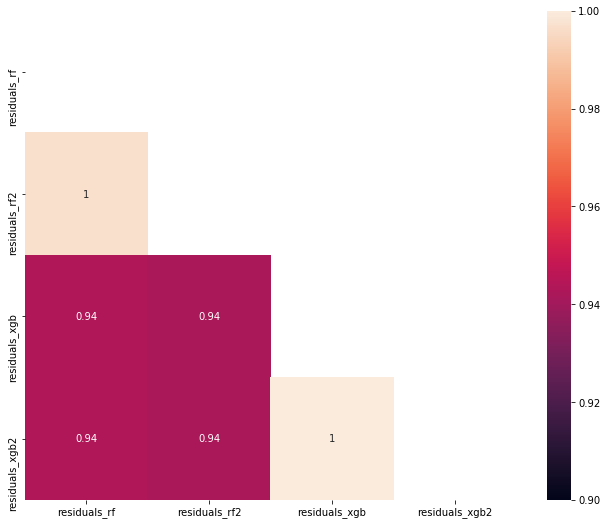

In [60]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,annot=True,vmin=0.9, vmax=1.00)

Podemos ver como los errores que comete un tipo de modelo están completamente correlacionados, independientemente de que se haya variado la semilla aleatoria. Por tanto, esto quiere decir que los modelos **cometen los mismos errores**. Hacer una combinación de modelos entrenados con distinta semilla, por tanto, no parece añadir muchas ventajas.

En cambio, los errores comeditos por los modelos xgb y los Random Forest, si bien están fuertemente correlacionados, no son exactamente iguales. Los diferentes modelos no se equivoca, ni en el mismo sitio, ni de la misma manera. Combinar dos modelos diferentes, por tanto, nos aporta **diversidad**, y puede ayudarnos a mejorar los resultados ya que un modelo puede compensar fallos puntuales del otro para ciertos clientes.

In [61]:
class WeightedEnsemble:
    def __init__(self,models,weights):
        self.models = models
        self.weights = weights
        
    def fit(self,X,y):
        for model in self.models:
            model.fit(X,y)
            
    def predict(self,X):
        y = np.zeros((X.shape[0]))
        for i in range(len(self.models)):
            y += (self.models[i].predict(X) * self.weights[i])
        return y

In [62]:
%%time
ensemble = WeightedEnsemble([xgb.XGBRegressor(max_depth=15, learning_rate=0.1, alpha=10,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=1.0,random_state=SEED),
                            RandomForestRegressor(n_estimators=50,
                                       criterion='mse', max_depth=23, max_features='auto',n_jobs=4,
                                       min_samples_leaf=5,random_state=SEED)],
                            [0.5,0.5])

scores_rmse,scores_mae,scores_mad = train_and_evaluate(ensemble,splits)

print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('beta_ensemble',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 18799.688457
MAE: 4337.823104
MAD: 2062.911431
Wall time: 15min 34s


In [63]:
%%time
ensemble = WeightedEnsemble([xgb.XGBRegressor(max_depth=20, learning_rate=0.1, alpha=0,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=20.0,random_state=SEED ),
                            RandomForestRegressor(n_estimators=50,
                                       criterion='mse', max_depth=23, max_features='auto',n_jobs=4,
                                       min_samples_leaf=5,random_state=SEED)],
                            [0.5,0.5])

scores_rmse,scores_mae,scores_mad = train_and_evaluate(ensemble,splits)

print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('beta_ensemble',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

RMSE: 18736.576591
MAE: 4343.120189
MAD: 2051.152324
Wall time: 16min 49s


<a name=Predicción></a>
# Predicción
[Volver al Indice](#Indice)

In [64]:
splits = []

model = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=23, max_features='auto',min_samples_leaf=5,random_state=SEED)

# Entrenamos con todos los datos
f_train_df = process_df(train_df,0,train = True)

x_train = f_train_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = f_train_df["Poder_Adquisitivo"].as_matrix()



model.fit(X=x_train,y=y_train)


test_df = pd.read_csv("data/original/Dataset_Salesforce_Predictive_Modelling_TEST.txt")
ids = test_df["ID_Customer"].copy()
test_df =  process_df(test_df,0,train = False)

x_test = test_df.as_matrix()

# Estiamamos el poder adquisitivo
y = model.predict(X=x_test)




c:\users\zhon\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Solo nos falta escribir estos resultados en disco.

In [65]:
out = pd.DataFrame(np.stack((ids, y), axis=1, out=None), columns=['ID_Customer', 'PA_Est']).set_index('ID_Customer')
out.to_csv('Test_Mission.txt')

<a name=Anexo1></a>
# Anexo 1: Otros modelos considerados
[Volver al Indice](#Indice)

In [66]:
splits 1

SyntaxError: invalid syntax (<ipython-input-66-b86181ba71bf>, line 1)

In [ ]:
model = Lasso(random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('Lasso',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
model = Ridge(random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('Ridge',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
model = ElasticNet(random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('ElasticNet',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

Todos los modelos lineales parecen obtener resultados comparables. Probamos ahora con redes neuronales.

In [ ]:
model = MLPRegressor(max_iter=200,hidden_layer_sizes=(25,25,25),early_stopping=True,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))



In [ ]:
model = MLPRegressor(max_iter=200,hidden_layer_sizes=(50,50,50),early_stopping=True,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))


In [ ]:
model = MLPRegressor(max_iter=200,hidden_layer_sizes=(25,25,25,25),early_stopping=True,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))


In [ ]:
model = MLPRegressor(max_iter=200,hidden_layer_sizes=(25,25,25,25,25),early_stopping=True,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))



In [ ]:
model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=5, max_features='log2',min_samples_leaf=5,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

In [ ]:
model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=7, max_features='log2',min_samples_leaf=5,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

Podemos ver como la profundidad máxima afecta de manera importante al rendimiento.

In [ ]:
model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=17, max_features='log2',min_samples_leaf=5,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('RF_d17',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
model = GradientBoostingRegressor(random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

In [ ]:
model = GradientBoostingRegressor(random_state=SEED,min_samples_leaf=5)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

In [ ]:
splits 0

In [ ]:
model = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=23, max_features='auto',min_samples_leaf=5,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw RF_d23_n100_FULL',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
model = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=24, max_features='auto',min_samples_leaf=5,random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw RF_d24_FULL',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
model = GradientBoostingRegressor(random_state=SEED)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('raw Gradient Boost_d3',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

# Experimentos fase 2

In [ ]:
%%time
params =  {'max_depth': 7, 'eta': 0.1, 'silent': 1, 'objective': 'reg:linear', 'eval_metric':'rmse','nthread':3, 'seed':SEED}
model = XGBoostModel(params,100)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw_XGB_d7_eta0.1_n100',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
%%time
params =  {'max_depth': 9, 'eta': 0.1, 'silent': 1, 'objective': 'reg:linear', 'eval_metric':'rmse','nthread':3,'seed':SEED}
model = XGBoostModel(params,100)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw_XGB_d9_eta0.1_n100',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
%%time
params =  {'max_depth': 13, 'eta': 0.1, 'silent': 1, 'objective': 'reg:linear', 'eval_metric':'rmse','nthread':3,'seed':SEED}
model = XGBoostModel(params,100)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw_XGB_d13_eta0.1_n100',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
%%time
params =  {'max_depth': 13, 'eta': 0.1, 'silent': 1, 'objective': 'reg:linear', 'subsample':0.8,'eval_metric':'rmse','nthread':4,'seed':SEED}
model = XGBoostModel(params,100)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw_XGB_d13_eta0.1_n100_sbspl',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

# Bayesian optimization

In [ ]:
f_train_df = process_df(shuffled_data,0,train = True)

X_train = f_train_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = f_train_df["Poder_Adquisitivo"].as_matrix()

xgtrain = xgb.DMatrix(X_train, label=y_train)


def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=100, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(5)])

    return -cv_result['test-mae-mean'].values[-1]





random_state = SEED
num_iter = 50
init_points = 25
params = {
    'eta': 0.1,
    'silent': 1,
    'eval_metric': 'mae',
    'verbose_eval': True,
    'seed': random_state
}

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                            'colsample_bytree': (0.1, 1),
                                            'max_depth': (5, 20),
                                            'subsample': (0.5, 1),
                                            'gamma': (0, 15),
                                            'alpha': (0, 15),
                                            })

xgbBO.maximize(init_points=init_points, n_iter=num_iter)

print(xgbBO.res['max'])

In [ ]:
f_train_df = process_df(shuffled_data,1,train = True)

X_train = f_train_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = f_train_df["Poder_Adquisitivo"].as_matrix()

xgtrain = xgb.DMatrix(X_train, label=y_train)


def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=100, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(5)])

    return -cv_result['test-mae-mean'].values[-1]





random_state = SEED
num_iter = 50
init_points = 25
params = {
    'eta': 0.1,
    'silent': 1,
    'eval_metric': 'mae',
    'verbose_eval': True,
    'seed': random_state
}

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                            'colsample_bytree': (0.1, 1),
                                            'max_depth': (5, 20),
                                            'subsample': (0.5, 1),
                                            'gamma': (0, 15),
                                            'alpha': (0, 15),
                                            })

xgbBO.maximize(init_points=init_points, n_iter=num_iter)

print(xgbBO.res['max'])

In [ ]:
f_train_df = process_df(shuffled_data,0,train = True)

X_train = f_train_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = f_train_df["Poder_Adquisitivo"].as_matrix()

def model_evaluate(n_estimators,
                 max_depth,
                max_features,
                 min_samples_leaf,
                  ):

    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_leaf = int(min_samples_leaf)
    max_features = max(min(max_features, 1), 0.1)

    model = RandomForestRegressor(n_estimators=n_estimators,
                 max_depth=max_depth,
                max_features=max_features,
                 min_samples_leaf=min_samples_leaf,
                                 n_jobs=4,random_state=SEED)

    cv_result = cross_val_score(model,X_train,y_train,cv=kf,scoring="neg_mean_absolute_error")

    return np.mean(cv_result)


num_iter = 50
init_points = 15


modelBO = BayesianOptimization(model_evaluate, {'n_estimators': (30, 100),
                                            'max_depth': (15, 25),
                                            'min_samples_leaf': (1, 200),
                                                'max_features' :(0.1,1),
                                            })

modelBO.maximize(init_points=init_points, n_iter=num_iter)

print(modelBO.res['max'])

In [ ]:
%%time 
model = RandomForestRegressor(n_estimators=100,
                 max_depth=25,
                max_features=1.0,
                 min_samples_leaf=31,
                                 n_jobs=4,random_state=SEED)

scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('bla',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
49 | 21m01s | -4381.25574 |     25.0000 |         1.0000 |            31.3392 |       100.0000

In [ ]:
f_train_df = process_df(shuffled_data,0,train = True)

X_train = f_train_df.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = f_train_df["Poder_Adquisitivo"].as_matrix()

def model_evaluate(n_estimators,
                 max_depth,
                max_features,
                 min_samples_leaf,
                  ):

    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_leaf = int(min_samples_leaf)
    max_features = max(min(max_features, 1), 0.1)

    model = RandomForestRegressor(n_estimators=n_estimators,
                 max_depth=max_depth,
                max_features=max_features,
                 min_samples_leaf=min_samples_leaf,
                                 n_jobs=4,random_state=SEED)

    cv_result = cross_val_score(model,X_train,y_train,cv=kf,scoring="neg_median_absolute_error")

    return np.mean(cv_result)


num_iter = 50
init_points = 10


modelBO_2 = BayesianOptimization(model_evaluate, {'n_estimators': (30, 100),
                                            'max_depth': (17, 27),
                                            'min_samples_leaf': (5, 200),
                                                'max_features' :(0.5,1),
                                            })

modelBO_2.maximize(init_points=init_points, n_iter=num_iter)

print(modelBO_2.res['max'])

In [ ]:
%%time 
model = RandomForestRegressor(n_estimators=100,
                 max_depth=27,
                max_features=1.0,
                 min_samples_leaf=5,
                                 n_jobs=4,random_state=SEED)

scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('bla',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
splits = []
splits = get_splits(kf,0)

In [ ]:
%%time
model = xgb.XGBRegressor(max_depth=15, learning_rate=0.1, alpha=10,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=1.0,random_state=SEED )

scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('bla',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
%%time
model = xgb.XGBRegressor(max_depth=20, learning_rate=0.1, alpha=0,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=20.0,random_state=SEED )

scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('bla',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
splits = []

In [ ]:
"""
%%time
params =  {'max_depth': 9, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'eval_metric':'rmse','seed':SEED}
model = XGBoostModel(params,500)
scores_rmse,scores_mae,scores_mad = train_and_evaluate(model,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))
record_scores('raw_XGB_d9_eta0.01_n500',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))
"""

## Stacking ml-ens

In [ ]:
splits = []
splits = get_splits(kf,0)

ensemble = SuperLearner(verbose=2)

n = 146

ensemble.add([LinearRegression(),
          DecisionTreeRegressor(min_samples_split=200, min_samples_leaf=50, random_state=SEED),
          GradientBoostingRegressor(random_state=SEED,min_samples_leaf=5),
          xgb.XGBRegressor(max_depth=15, learning_rate=0.1, alpha=10,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=1.0,random_state=SEED),
          RandomForestRegressor(n_estimators=50,
                                       criterion='mse', max_depth=23, max_features='auto',n_jobs=4,
                                       min_samples_leaf=5,random_state=SEED)],propagate_features=[i for i in range(n)])

ensemble.add_meta(RandomForestRegressor(n_estimators=50,
                                       criterion='mse', max_depth=17, max_features='auto',n_jobs=4,
                                       min_samples_leaf=5,random_state=SEED))

scores_rmse,scores_mae,scores_mad = train_and_evaluate(ensemble,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('alpha_ensemble',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
class WeightedEnsemble:
    def __init__(self,models,weights):
        self.models = models
        self.weights = weights
        
    def fit(self,X,y):
        for model in self.models:
            model.fit(X,y)
            
    def predict(self,X):
        y = np.zeros((X.shape[0]))
        for i in range(len(self.models)):
            y += (self.models[i].predict(X) * self.weights[i])
        return y
        

In [ ]:
ensemble = WeightedEnsemble([LinearRegression(),DecisionTreeRegressor()],[0.5,0.5])

scores_rmse,scores_mae,scores_mad = train_and_evaluate(ensemble,splits)


print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('alpha_ensemble',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
%%time
ensemble = WeightedEnsemble([xgb.XGBRegressor(max_depth=15, learning_rate=0.1, alpha=10,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=1.0,random_state=SEED),
                            RandomForestRegressor(n_estimators=50,
                                       criterion='mse', max_depth=23, max_features='auto',n_jobs=4,
                                       min_samples_leaf=5,random_state=SEED)],
                            [0.5,0.5])

scores_rmse,scores_mae,scores_mad = train_and_evaluate(ensemble,splits)

print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('beta_ensemble',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))

In [ ]:
%%time
ensemble = WeightedEnsemble([xgb.XGBRegressor(max_depth=20, learning_rate=0.1, alpha=0,n_estimators=30, silent=True, objective='reg:linear', 
                         n_jobs=4, subsample=1.0,colsample_bytree=1.0,min_child_weight=20.0,random_state=SEED ),
                            RandomForestRegressor(n_estimators=50,
                                       criterion='mse', max_depth=23, max_features='auto',n_jobs=4,
                                       min_samples_leaf=5,random_state=SEED)],
                            [0.5,0.5])

scores_rmse,scores_mae,scores_mad = train_and_evaluate(ensemble,splits)

print("RMSE: %f" % np.mean(scores_rmse))
print("MAE: %f" % np.mean(scores_mae))
print("MAD: %f" % np.mean(scores_mad))

record_scores('beta_ensemble',np.mean(scores_rmse),np.mean(scores_mae),np.mean(scores_mad))